In [2]:
import pickle
import numpy as np
import pandas as pd
import dgl
from tqdm import tqdm

In [5]:
class HighD_Dataset():
    def preprocess(self,filename):
        # 原始数据的性质
        self.df = pd.read_csv(filename)
        self.frames = self.df['frame'].max()
        self.max_nodes = self.df.groupby("frame").count()['id'].max()

        self.graphs = []
        self.id_maps = []
        self.features = []
        # for i in range(10):
        for i in tqdm(range(self.frames)):
            data = self.df[self.df['frame'] == i+1]

            # 车辆ID要怎么分配? 每个graph中，节点都从0开始计数，再给出一个与全局ID匹配的索引表
            id_set = set(data['id'])
            id_map = {}
            for idx, _id in enumerate(id_set):
                id_map[_id] = idx
            
            graph = dgl.graph([])
            graph.add_nodes(len(id_set))
            feature = np.zeros((len(id_set), 8), dtype=np.float32)

            for i in range(len(data)):
                x = data.iloc[i]['id']
                y = set(data.iloc[i][10:17])-{0}
                for yy in y:
                    graph.add_edges([id_map[x],id_map[yy]],[id_map[yy],id_map[x]])

                # 数值型数据
                feature[id_map[x], 0:7] = data.iloc[i][2:9]
                # 类别型数据
                feature[id_map[x], 7] = 1 if data.iloc[i][9] == 'Car' else -1

            self.graphs.append(graph)
            self.id_maps.append(list(id_set))
            self.features.append(feature)
        return (self.graphs,self.id_maps,self.features)

In [6]:
dataset = HighD_Dataset()

with open("data_22.pkl",'wb') as f:
    pickle.dump(dataset.preprocess("../data/HighD/01.csv"), f)

100%|██████████| 22539/22539 [11:25<00:00, 32.90it/s]


[519]
[[ 4.0428e+02  9.5900e+00 -3.6470e+01 -3.6000e-01 -4.0000e-02  2.0000e-02
   2.0000e+00  1.0000e+00]]


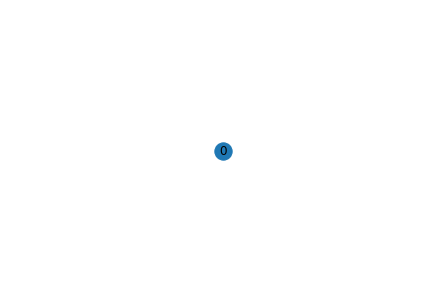

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

with open("data_22.pkl",'rb') as f:
    (graphs, id_maps, features) = pickle.load(f)
    g = graphs[10398]
    print(id_maps[10398])
    print(features[10398])
    nx.draw(g.to_networkx(), with_labels=True)
    plt.show()